#Feature Extraction using the nltk module, check for final_features nb for better results


In [ ]:
import pandas as pd
df = pd.read_csv('balanced.csv',encoding='utf-8')
df.head()  #spoken=1  written=0

,texts,label
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0
2,हमे इन्तजार है ।,1
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1
4,जयपुर,0


In [ ]:
df = df[df['texts'].apply(lambda x: isinstance(x, str))]

In [ ]:
label_counts = df['label'].value_counts()
label_counts

label
0    19344
1    19344
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

texts    0
label    0
dtype: int64

### Features

1.   Number of words in a sentence
2.   Average characters per word in a sentence
3.   Token Type Ratio
4.   Case Marker Percentage
5.   Case Marker Count
6.   Conjunctions Percentage
7.   Conjuctions Count
8.   Hesitation Markers
9.   Wh Questions
10.  Noun Count
11.  Noun Percentage
12.  Adverb Count
13.  Adverb Percentage
14.  Verb Count
15.  Verb Percentage
16.  Personal Pronouns Count
17.  Personal Pronouns Percentage
18.  Depth of Parse Tree






In [ ]:
#Number of words in a sentence
def count_words(sentence):
    return len(sentence.split())
df['words_per_sent'] = df['texts'].apply(count_words)
df.head()

,texts,label,words_per_sent
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13
2,हमे इन्तजार है ।,1,4
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11
4,जयपुर,0,1


In [ ]:
#Average Characters per word in a sentence
def avg_chars_per_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    total_chars = sum(len(word) for word in words)
    return total_chars / len(words)
df['avg_characters_per_word'] = df['texts'].apply(avg_chars_per_word)
df.head()

,texts,label,words_per_sent,avg_characters_per_word
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385
2,हमे इन्तजार है ।,1,4,3.250000
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909
4,जयपुर,0,1,5.000000


In [ ]:
#Token Type Ratio

!pip install indic-nlp-library
from indicnlp.tokenize import indic_tokenize

def token_type_ratio(text):
    tokens = indic_tokenize.trivial_tokenize(text)  # Use Indic NLP tokenizer

    unique_tokens = set(tokens)
    ttr = len(unique_tokens) / len(tokens)

    return ttr

df['token_type_ratio'] = df['texts'].apply(token_type_ratio)
df.head()

,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000
2,हमे इन्तजार है ।,1,4,3.250000,1.000000
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000
4,जयपुर,0,1,5.000000,1.000000


In [ ]:
#Case Marker Percentage
import re

def count_case_markers(text):
    case_markers = ["ने", "को", "से", "के", "का", "की", "के", "की", "में", "पर", "तक", "से"]
    words = text.split()


    count = 0
    for word in words:
        if word in case_markers:
            count += 1
    case_marker_percentage = count / len(words) * 100
    return case_marker_percentage

df['case_marker_perc'] = df['texts'].apply(count_case_markers)
df.head()

,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143,14.814815
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000,23.076923
2,हमे इन्तजार है ।,1,4,3.250000,1.000000,0.000000
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000,9.090909
4,जयपुर,0,1,5.000000,1.000000,0.000000


In [ ]:
#Case Marker Count
def count_case_markers(text):
    case_markers = ["ने", "को", "से", "के", "का", "की", "के", "की", "में", "पर", "तक", "से"]
    words = text.split()

    count = 0
    for word in words:
        if word in case_markers:
            count += 1

    return count

df['case_marker_count'] = df['texts'].apply(count_case_markers)
df.head()

,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143,14.814815,4
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000,23.076923,3
2,हमे इन्तजार है ।,1,4,3.250000,1.000000,0.000000,0
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000,9.090909,1
4,जयपुर,0,1,5.000000,1.000000,0.000000,0


In [ ]:
# Conjunctions in a sentence
conjunctions = [
    "और", "तथा", "पर", "लेकिन", "किन्तु", "मगर", "फिर", "इसलिए", "इसके बाद",
    "इसके पहले", "जबकि", "जैसा कि", "जब तक", "या", "नहीं तो", "इसलिए",
    "जबकी", "इसलिए", "चाहे", "या तो", "कि", "क्योंकि", "जब तक", "जैसे",
    "भले ही", "जितना", "जब", "कि", "चाहे", "कि", "अगर", "चाहे", "वर्तमान में",
    "तब तक", "जबकि", "जो", "यदि", "कि", "किसके बावजूद", "यह बात", "जब तक",
    "जैसा", "जैसे", "जितना", "की", "की", "कि"
]

def count_conjunctions(text):
    words = text.split()
    conjunction_count = 0
    for word in words:
        if word in conjunctions:
            conjunction_count += 1
    return conjunction_count

df['conjunction_count'] = df['texts'].apply(count_conjunctions)
df.head()

,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143,14.814815,4,3
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000,23.076923,3,1
2,हमे इन्तजार है ।,1,4,3.250000,1.000000,0.000000,0,0
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000,9.090909,1,0
4,जयपुर,0,1,5.000000,1.000000,0.000000,0,0


In [ ]:
# Percentage of conjunctions in a sentence
def conjunctions_percentage(text):
    words = text.split()
    conjunction_count = 0
    for word in words:
        if word in conjunctions:
            conjunction_count += 1
    conjunction_percentage = (conjunction_count / len(words)) * 100
    return conjunction_percentage

df['conjunctions_percentage'] = df['texts'].apply(conjunctions_percentage)
df.head()

,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143,14.814815,4,3,11.111111
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000,23.076923,3,1,7.692308
2,हमे इन्तजार है ।,1,4,3.250000,1.000000,0.000000,0,0,0.000000
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000,9.090909,1,0,0.000000
4,जयपुर,0,1,5.000000,1.000000,0.000000,0,0,0.000000


In [ ]:
#Hesitation Markers
hesitation_markers = ['अच्छा', 'मतलब', 'वो', 'तो', 'जैसे', 'और', 'क्या', 'है', 'ही', 'ना', 'अब', 'यानी']
def count_hesitation_markers(sentence):
    words = sentence.split()
    return sum(word in hesitation_markers for word in words)
df['hesitation_markers'] = df['texts'].apply(count_hesitation_markers)
df.head()

,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143,14.814815,4,3,11.111111,2
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000,23.076923,3,1,7.692308,0
2,हमे इन्तजार है ।,1,4,3.250000,1.000000,0.000000,0,0,0.000000,1
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000,9.090909,1,0,0.000000,1
4,जयपुर,0,1,5.000000,1.000000,0.000000,0,0,0.000000,0


In [ ]:
# Wh-questions in Hindi
wh_questions = ["कौन", "क्या", "कब", "कहाँ", "कैसे", "क्यों"]
def count_wh_questions(text):
    words = text.split()
    wh_question_count = 0
    for word in words:
        if word in wh_questions:
            wh_question_count += 1
    return wh_question_count

df['wh_question_count'] = df['texts'].apply(count_wh_questions)
df.head()

,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers,wh_question_count
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143,14.814815,4,3,11.111111,2,0
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000,23.076923,3,1,7.692308,0,0
2,हमे इन्तजार है ।,1,4,3.250000,1.000000,0.000000,0,0,0.000000,1,0
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000,9.090909,1,0,0.000000,1,0
4,जयपुर,0,1,5.000000,1.000000,0.000000,0,0,0.000000,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Separate features and target
X = df.drop('label', axis=1)
X = X.drop('texts', axis=1)
y = df['label']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

# Calculate the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8706384078573275

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3826
           1       0.87      0.88      0.87      3912

    accuracy                           0.87      7738
   macro avg       0.87      0.87      0.87      7738
weighted avg       0.87      0.87      0.87      7738



<ipython-input-20-a0eb0c75c27e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[importance for _, importance in features_sorted], y=[feature for feature, _ in features_sorted], palette="viridis", alpha=0.8)


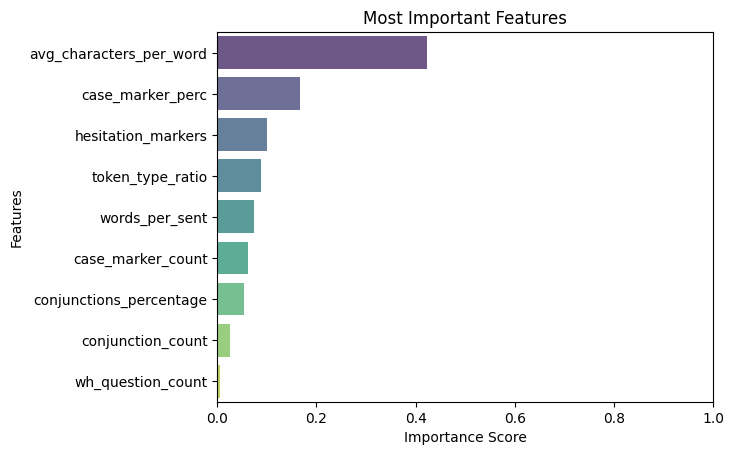

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
importances = rf.feature_importances_

# Sort features and importances
features_sorted = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Create a horizontal bar chart with color and transparency
ax = sns.barplot(x=[importance for _, importance in features_sorted], y=[feature for feature, _ in features_sorted], palette="viridis", alpha=0.8)

# Set the title, labels, and limits
plt.title("Most Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.xlim([0, 1])
plt.show()


In [ ]:
#SVM
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM Accuracy:", accuracy_svm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))



SVM Accuracy: 0.8568105453605582

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      3826
           1       0.87      0.84      0.86      3912

    accuracy                           0.86      7738
   macro avg       0.86      0.86      0.86      7738
weighted avg       0.86      0.86      0.86      7738



In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred_logistic = logistic_regression.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("\nLogistic Regression Accuracy:", accuracy_logistic)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.8456965624192297

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      3826
           1       0.86      0.83      0.85      3912

    accuracy                           0.85      7738
   macro avg       0.85      0.85      0.85      7738
weighted avg       0.85      0.85      0.85      7738



In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("\nDecision Tree Accuracy:", accuracy_decision_tree)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_decision_tree))


Decision Tree Accuracy: 0.8383303179116051

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3826
           1       0.83      0.85      0.84      3912

    accuracy                           0.84      7738
   macro avg       0.84      0.84      0.84      7738
weighted avg       0.84      0.84      0.84      7738



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
def count_nouns_and_percentage(text):
    words = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(words)
    noun_count = sum(1 for word, pos in tagged if pos.startswith('NN'))

    # Calculate percentage of nouns
    total_words = len(words)
    noun_percentage = (noun_count / total_words) * 100 if total_words > 0 else 0

    return noun_count, noun_percentage
df['noun_count'], df['noun_percentage'] = zip(*df['texts'].apply(count_nouns_and_percentage))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers,wh_question_count,noun_count,noun_percentage
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143,14.814815,4,3,11.111111,2,0,26,96.296296
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000,23.076923,3,1,7.692308,0,0,12,92.307692
2,हमे इन्तजार है ।,1,4,3.250000,1.000000,0.000000,0,0,0.000000,1,0,3,75.000000
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000,9.090909,1,0,0.000000,1,0,10,90.909091
4,जयपुर,0,1,5.000000,1.000000,0.000000,0,0,0.000000,0,0,1,100.000000


In [ ]:
def count_verbs_and_percentage(text):
    words = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(words)
    verb_count = sum(1 for word, pos in tagged if pos.startswith('VB'))

    # Calculate percentage of nouns
    total_words = len(words)
    verb_percentage = (verb_count / total_words) * 100 if total_words > 0 else 0

    return verb_count, verb_percentage
df['verb_count'], df['verb_percentage'] = zip(*df['texts'].apply(count_verbs_and_percentage))
df.head()

,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers,wh_question_count,noun_count,noun_percentage,verb_count,verb_percentage
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143,14.814815,4,3,11.111111,2,0,26,96.296296,0,0.0
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000,23.076923,3,1,7.692308,0,0,12,92.307692,0,0.0
2,हमे इन्तजार है ।,1,4,3.250000,1.000000,0.000000,0,0,0.000000,1,0,3,75.000000,0,0.0
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000,9.090909,1,0,0.000000,1,0,10,90.909091,0,0.0
4,जयपुर,0,1,5.000000,1.000000,0.000000,0,0,0.000000,0,0,1,100.000000,0,0.0


In [ ]:
def count_adverbs_and_percentage(text):
    words = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(words)
    adverb_count = sum(1 for word, pos in tagged if pos.startswith('RB'))

    # Calculate percentage of nouns
    total_words = len(words)
    adverb_percentage = (adverb_count / total_words) * 100 if total_words > 0 else 0

    return adverb_count, adverb_percentage
df['adverb_count'], df['adverb_percentage'] = zip(*df['texts'].apply(count_adverbs_and_percentage))
df.head()

,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers,wh_question_count,noun_count,noun_percentage,verb_count,verb_percentage,adverb_count,adverb_percentage
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143,14.814815,4,3,11.111111,2,0,26,96.296296,0,0.0,0,0.0
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000,23.076923,3,1,7.692308,0,0,12,92.307692,0,0.0,0,0.0
2,हमे इन्तजार है ।,1,4,3.250000,1.000000,0.000000,0,0,0.000000,1,0,3,75.000000,0,0.0,0,0.0
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000,9.090909,1,0,0.000000,1,0,10,90.909091,0,0.0,0,0.0
4,जयपुर,0,1,5.000000,1.000000,0.000000,0,0,0.000000,0,0,1,100.000000,0,0.0,0,0.0


In [ ]:
def count_pronouns_and_percentage(text):
    words = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(words)
    pronoun_count = sum(1 for word, pos in tagged if pos.startswith('PRP') or pos == 'WP')

    # Calculate percentage of nouns
    total_words = len(words)
    pronoun_percentage = (pronoun_count / total_words) * 100 if total_words > 0 else 0

    return  pronoun_count, pronoun_percentage
df['pronoun_count'], df['pronoun_percentage'] = zip(*df['texts'].apply(count_pronouns_and_percentage))
df.head()

,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers,wh_question_count,noun_count,noun_percentage,verb_count,verb_percentage,adverb_count,adverb_percentage,pronoun_count,pronoun_percentage
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143,14.814815,4,3,11.111111,2,0,26,96.296296,0,0.0,0,0.0,0,0.0
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000,23.076923,3,1,7.692308,0,0,12,92.307692,0,0.0,0,0.0,0,0.0
2,हमे इन्तजार है ।,1,4,3.250000,1.000000,0.000000,0,0,0.000000,1,0,3,75.000000,0,0.0,0,0.0,0,0.0
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000,9.090909,1,0,0.000000,1,0,10,90.909091,0,0.0,0,0.0,0,0.0
4,जयपुर,0,1,5.000000,1.000000,0.000000,0,0,0.000000,0,0,1,100.000000,0,0.0,0,0.0,0,0.0


In [ ]:
from nltk import Tree

def create_simple_parse_tree(text):
    words = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(words)
    tree = Tree('S', [Tree(pos, [word]) for word, pos in tagged])
    return tree

def calculate_tree_depth(tree):
    if not isinstance(tree, Tree):
        return 0
    elif len(tree) == 0:
        return 1
    else:
        return 1 + max(calculate_tree_depth(t) for t in tree)

def get_parse_tree_depth(text):
    tree = create_simple_parse_tree(text)
    depth = calculate_tree_depth(tree)
    return depth
df['parse_tree_depth'] = df['texts'].apply(get_parse_tree_depth)
df.head()

,texts,label,words_per_sent,avg_characters_per_word,token_type_ratio,case_marker_perc,case_marker_count,conjunction_count,conjunctions_percentage,hesitation_markers,wh_question_count,noun_count,noun_percentage,verb_count,verb_percentage,adverb_count,adverb_percentage,pronoun_count,pronoun_percentage,parse_tree_depth
0,अमेरिकी और रूसी पुलिस के संयुक्त अभियान के फलस...,0,27,4.407407,0.857143,14.814815,4,3,11.111111,2,0,26,96.296296,0,0.0,0,0.0,0,0.0,2
1,आज यहां रांची एक्सप्रेस के साथ बातचीत में वित्...,0,13,4.615385,1.000000,23.076923,3,1,7.692308,0,0,12,92.307692,0,0.0,0,0.0,0,0.0,2
2,हमे इन्तजार है ।,1,4,3.250000,1.000000,0.000000,0,0,0.000000,1,0,3,75.000000,0,0.0,0,0.0,0,0.0,2
3,जिस के नतीजे मे ये हुक्म सादिर किया गया है ।,1,11,3.090909,1.000000,9.090909,1,0,0.000000,1,0,10,90.909091,0,0.0,0,0.0,0,0.0,2
4,जयपुर,0,1,5.000000,1.000000,0.000000,0,0,0.000000,0,0,1,100.000000,0,0.0,0,0.0,0,0.0,2


In [ ]:
# Separate features and target
X = df.drop('label', axis=1)
X = X.drop('texts', axis=1)
y = df['label']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

# Calculate the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8791677436029982

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3826
           1       0.88      0.89      0.88      3912

    accuracy                           0.88      7738
   macro avg       0.88      0.88      0.88      7738
weighted avg       0.88      0.88      0.88      7738



<ipython-input-42-a0eb0c75c27e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[importance for _, importance in features_sorted], y=[feature for feature, _ in features_sorted], palette="viridis", alpha=0.8)


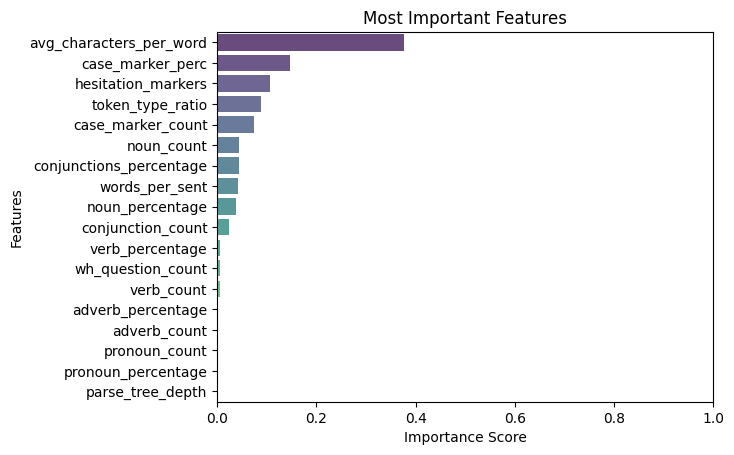

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
importances = rf.feature_importances_

# Sort features and importances
features_sorted = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Create a horizontal bar chart with color and transparency
ax = sns.barplot(x=[importance for _, importance in features_sorted], y=[feature for feature, _ in features_sorted], palette="viridis", alpha=0.8)

# Set the title, labels, and limits
plt.title("Most Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.xlim([0, 1])
plt.show()